<a href="https://colab.research.google.com/github/white22ne/ProyectoDS_Partel-Blanco.ipynb/blob/main/ProyectoDS_Partel%2BGBlanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# En este proyecto realizo un analisis completo de un dataset que contiene informacion de distintos autos, sus caracteristicas principales y su precio. El objetivo es entender como se comportan las variables del conjunto de datos, evaluar la calidad general de la informacion y analizar si algunas caracteristicas pueden estar relacionadas con el valor final de un vehiculo. El proceso comienza con una exploracion inicial donde reviso la estructura del dataset, tipos de datos, valores faltantes y estadisticas generales. Esto permite tener una primera idea del rango de precios, los años mas frecuentes, los niveles de kilometraje y como se distribuyen las distintas variables categoricas como marca, tipo de combustible o estado del vehiculo.

# Luego avanzo con los graficos univariados para observar cada variable por separado y detectar patrones, concentraciones o posibles valores atipicos. Despues realizo graficos bivariados para comparar el precio con variables como ano, kilometraje, marca, condicion y tipo de combustible. Esto permite evaluar si existen relaciones claras o tendencias visibles entre las caracteristicas del auto y su valor. Finalmente incorporo un analisis multivariado para observar como interactuan varias variables al mismo tiempo y si esa combinacion aporta informacion adicional.

# Todo este proceso se relaciona con las preguntas e hipotesis planteadas al inicio del proyecto, que buscan determinar si la antiguedad, el uso, la marca o el tipo de combustible tienen impacto en el precio. El analisis completo permite evaluar si esas hipotesis se cumplen o no, y deja una conclusion final que resume los hallazgos del trabajo.





In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/white22ne/ProyectoDS_Partel-Blanco.ipynb/refs/heads/main/car_price_prediction_.csv"
car_price = pd.read_csv(url)

car_price.head()


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


# **Car** **ID** : el identificador de cada auto.

# **Brand** : la marca.

# **Year** : año del vehículo.

# **Engine** **Size** : tamaño del motor.

# **Fuel** **Type** : tipo de combustible (nafta, diésel, eléctrico, etc.).

# **Transmission** : tipo de transmisión (manual o automática).

# **Mileage** : kilometraje del auto.

# **Condition** : estado del vehículo (nuevo, usado, como nuevo).

# **Price** : precio del auto.

# **Model** : modelo específico de la marca.

In [14]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [15]:
car_price.describe(include='all')

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2500.00000,2500,2500.0000,2500.000000,2500,2500,2500.000000,2500,2500.000000,2500
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Diesel,Manual,NaN,Used,NaN,Fiesta
freq,NaN,374,NaN,NaN,655,1308,NaN,855,NaN,103
mean,1250.50000,NaN,2011.6268,3.465240,NaN,NaN,149749.844800,NaN,52638.022532,NaN
std,721.83216,NaN,6.9917,1.432053,NaN,NaN,87919.952034,NaN,27295.833455,NaN
min,1.00000,NaN,2000.0000,1.000000,NaN,NaN,15.000000,NaN,5011.270000,NaN
25%,625.75000,NaN,2005.0000,2.200000,NaN,NaN,71831.500000,NaN,28908.485000,NaN
50%,1250.50000,NaN,2012.0000,3.400000,NaN,NaN,149085.000000,NaN,53485.240000,NaN
75%,1875.25000,NaN,2018.0000,4.700000,NaN,NaN,225990.500000,NaN,75838.532500,NaN


In [16]:
car_price.isnull().sum()

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


# Preguntas de investigacion

1 - El año del auto influye en el precio?

2 - El kilometraje afecta el valor del vehiculo?

3 - La marca o el estado del auto generan diferencias de precio?

# Hipotesis
H1 : Los autos mas nuevos deberian tener precios mas altos.

H2 : A mayor kilometraje, el precio deberia bajar.

H3 : La marca y la condicion del auto deberian marcar diferencias de precio.

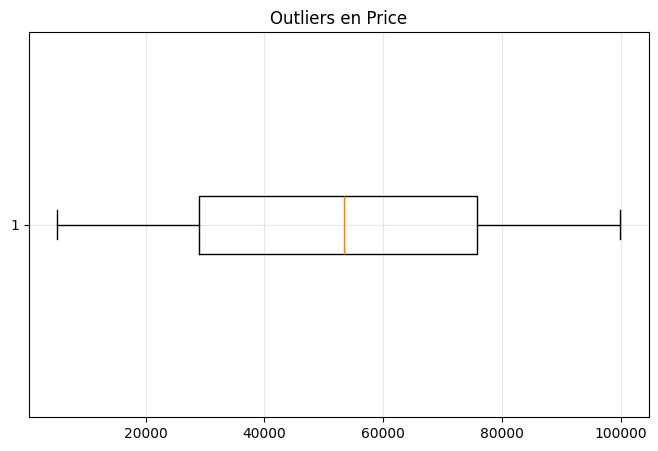

In [17]:
plt.figure(figsize=(8,5))
plt.boxplot(car_price['Price'], vert=False)
plt.title("Outliers en Price")
plt.grid(alpha=0.3)
plt.show()


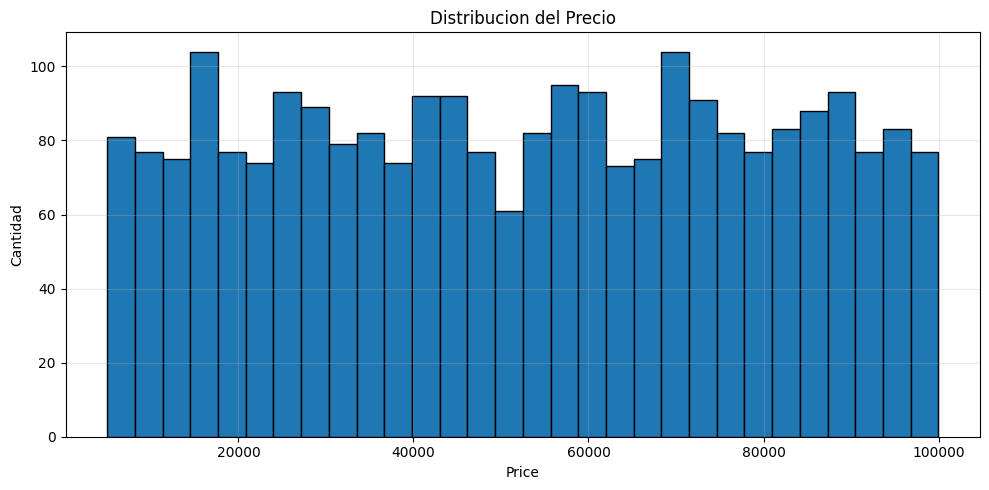

In [18]:
plt.figure(figsize=(10,5))
plt.hist(car_price['Price'], bins=30, edgecolor='black')
plt.title("Distribucion del Precio")
plt.xlabel("Price")
plt.ylabel("Cantidad")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


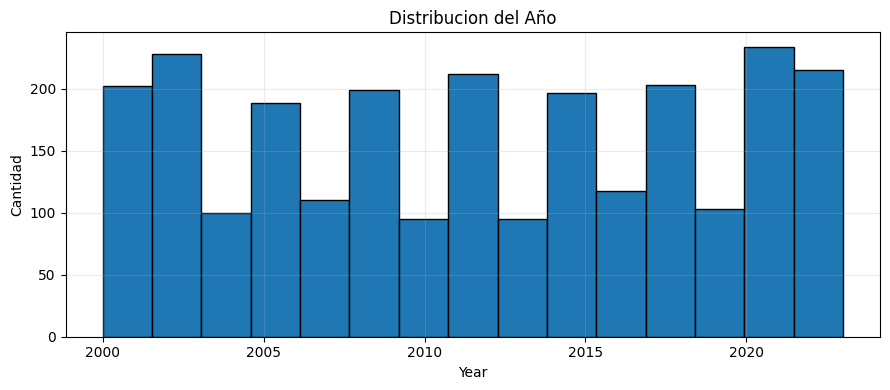

In [19]:
años = car_price['Year']
plt.figure(figsize=(9,4))
plt.hist(años, bins=15, edgecolor='black')
plt.title("Distribucion del Año")
plt.xlabel("Year")
plt.ylabel("Cantidad")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


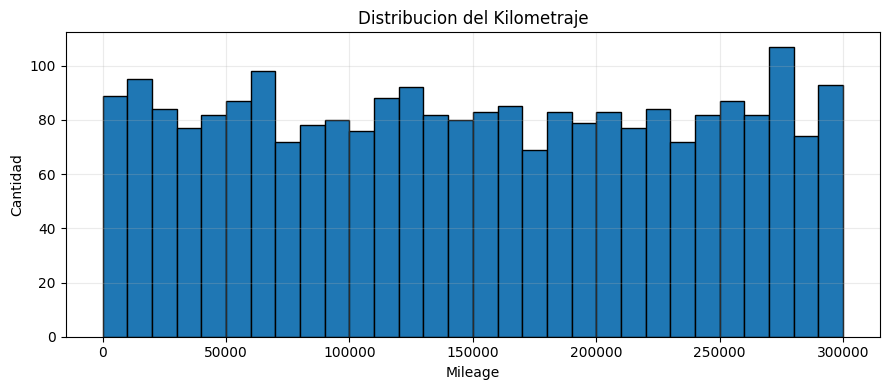

In [20]:
km = car_price['Mileage']
plt.figure(figsize=(9,4))
plt.hist(km, bins=30, edgecolor='black')
plt.title("Distribucion del Kilometraje")
plt.xlabel("Mileage")
plt.ylabel("Cantidad")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


# Interpretacion univariada:
# - El precio tiene mucha dispersion y outliers.
# - El año se concentra en autos relativamente nuevos.
# - El kilometraje es muy variado.
# - Ninguna variable tiene una distribucion limpia u homogénea.

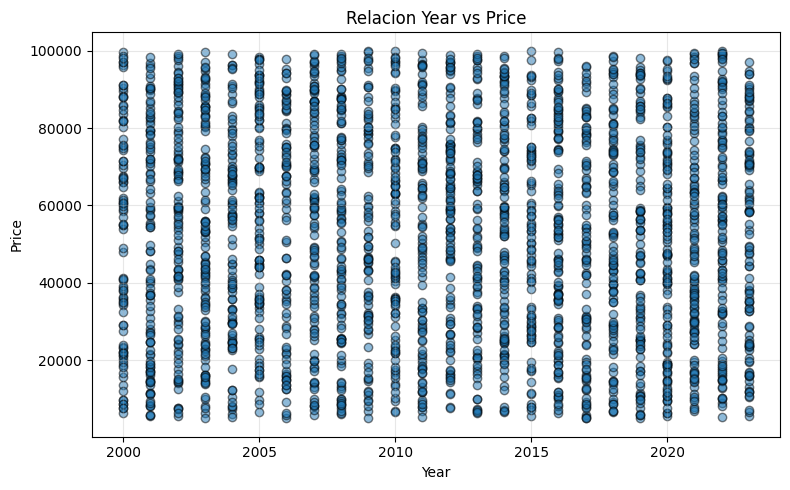

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(car_price['Year'], car_price['Price'], alpha=0.5, edgecolor='black')
plt.title("Relacion Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


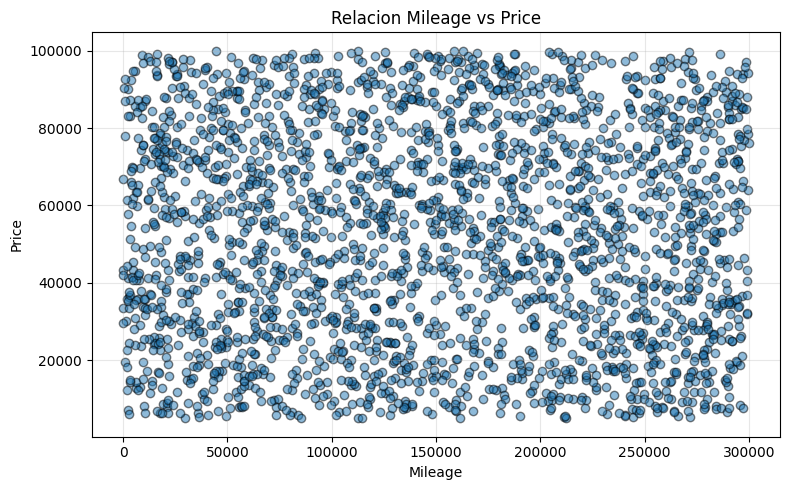

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(car_price['Mileage'], car_price['Price'], alpha=0.5, edgecolor='black')
plt.title("Relacion Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

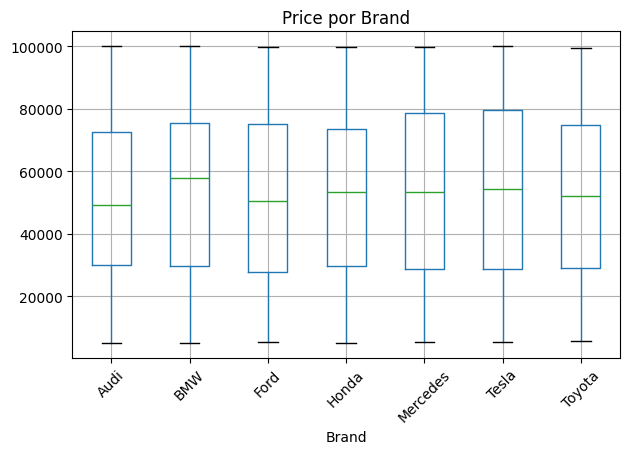

In [23]:
plt.figure(figsize=(10,5))
car_price.boxplot(column='Price', by='Brand', rot=45)
plt.title("Price por Brand")
plt.suptitle("")
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

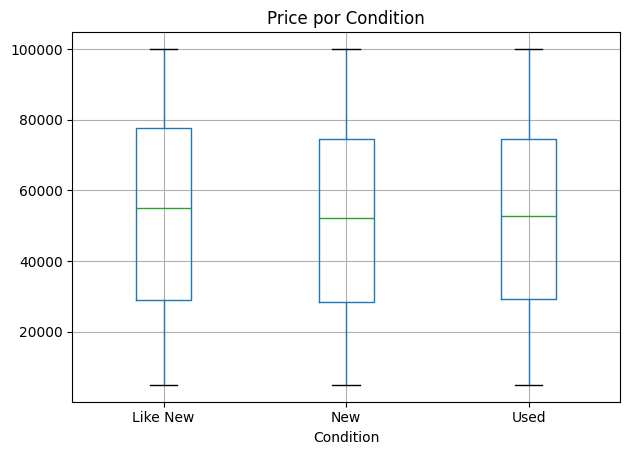

In [24]:
plt.figure(figsize=(8,5))
car_price.boxplot(column='Price', by='Condition')
plt.title("Price por Condition")
plt.suptitle("")
plt.tight_layout()
plt.show()


# Interpretacion bivariada:
# - No hay relacion fuerte entre Year y Price.
# - Mileage tampoco muestra una tendencia clara.
# - Algunas marcas tienen precios mas altos, pero no es determinante.
# - Condition marca diferencias, pero no muy fuertes.


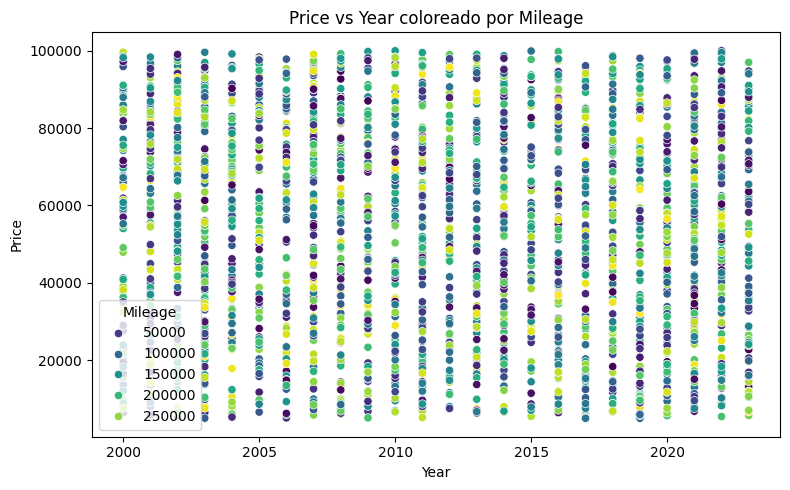

In [25]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=car_price, x='Year', y='Price', hue='Mileage', palette='viridis')
plt.title("Price vs Year coloreado por Mileage")
plt.tight_layout()
plt.show()


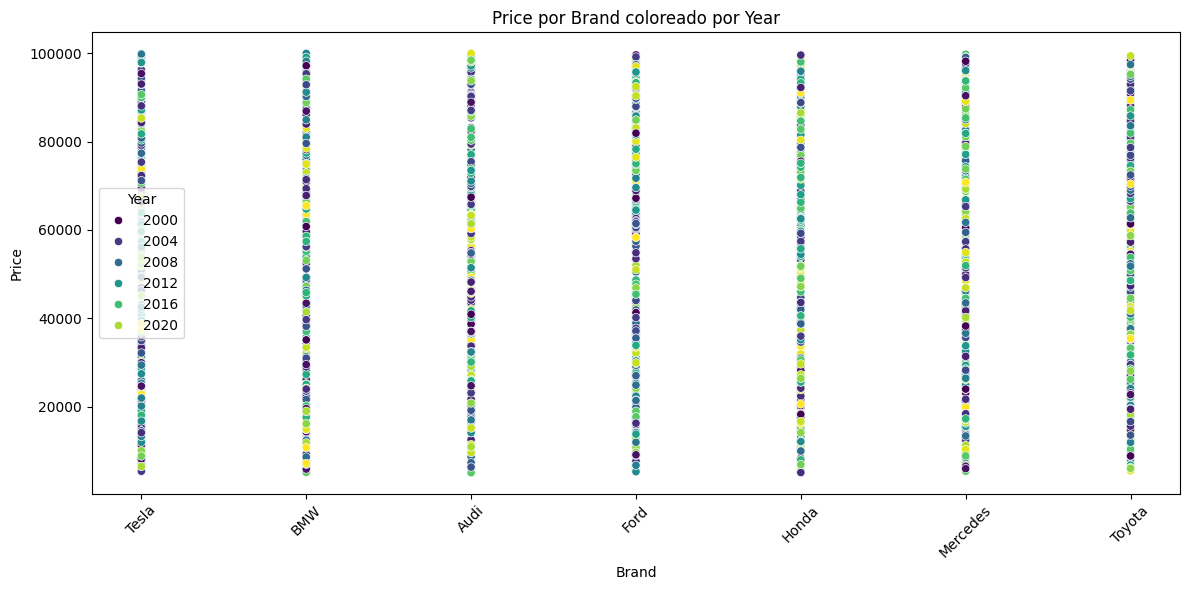

In [26]:

plt.figure(figsize=(12,6))
sns.scatterplot(data=car_price, x='Brand', y='Price', hue='Year', palette='viridis')
plt.title("Price por Brand coloreado por Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# **Interpretacion** **multivariada**:

# Las relaciones entre año, kilometraje, marca y precio estan muy dispersas.
# No hay grupos claros ni patrones fuertes.
# El precio no se explica bien con ninguna combinacion de variables.


In [27]:
corr = car_price.corr(numeric_only=True)
corr


,Car ID,Year,Engine Size,Mileage,Price
Car ID,1.000000,0.008050,0.000059,-0.035840,0.004650
Year,0.008050,1.000000,0.011833,0.002282,-0.036805
Engine Size,0.000059,0.011833,1.000000,-0.015782,-0.004420
Mileage,-0.035840,0.002282,-0.015782,1.000000,-0.008567
Price,0.004650,-0.036805,-0.004420,-0.008567,1.000000


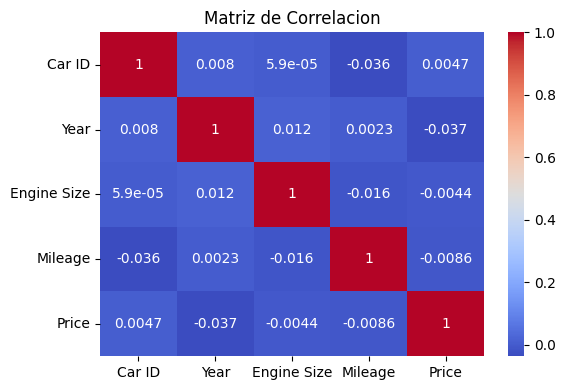

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlacion")
plt.tight_layout()
plt.show()



#              **Conclusiones** **finales** :

# - H1 : No hay relacion fuerte entre año y precio.
# - H2 : El kilometraje no explica el precio.
# - H3 : Marca y condicion influyen un poco.
# En general, el dataset no muestra relaciones solidas.
----------------------------------------------------------
